# Neural Networks for Handwritten Digit Recognition, Multiclass 

在这个练习中，您将使用神经网络来识别手写数字0-9。


# Outline
- [ 1 - Packages ](#1)
- [ 2 - ReLU Activation](#2)
- [ 3 - Softmax Function](#3)
  - [ Exercise 1](#ex01)
- [ 4 - Neural Networks](#4)
  - [ 4.1 Problem Statement](#4.1)
  - [ 4.2 Dataset](#4.2)
  - [ 4.3 Model representation](#4.3)
  - [ 4.4 Tensorflow Model Implementation](#4.4)
  - [ 4.5 Softmax placement](#4.5)
    - [ Exercise 2](#ex02)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

<a name="2"></a>
## 2 - ReLU Activation
本周，介绍了一种新的激活函数，称为修正线性单元（ReLU）。
$$ a = max(0,z) $$

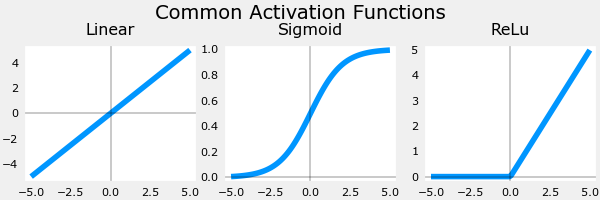

In [2]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
课程中的示例展示了ReLU的一个应用。在这个示例中，派生的“感知”特征不是二进制的，而是具有连续的值范围。对于开/关或二进制情况，sigmoid函数最适合。ReLU提供了连续的线性关系。此外，它还具有一个“关闭”范围，其中输出为零。


“关闭”特征使ReLU成为非线性激活函数。为什么需要这个呢？这使得多个单元可以对结果函数做出贡献，而不会相互干扰。这在支持的可选实验中会更详细地探讨。

<a name="3"></a>
## 3 - Softmax Function
一个多类神经网络会生成N个输出。其中一个输出被选为预测答案。在输出层，一个向量$\mathbf{z}$由一个线性函数生成，然后被送到softmax函数。softmax函数将$\mathbf{z}$ 转换为概率分布，如下所述。应用softmax后，每个输出将介于0和1之间，并且输出将总和为1。它们可以被解释为概率。softmax中较大的输入将对应着更大的输出概率。
<center>  <img  src="./images/C2_W2_NNSoftmax.PNG" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

<a name="ex01"></a>
### Exercise 1
Let's create a NumPy implementation:

In [3]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    a = np.exp(z)/np.sum(np.exp(z))
    ### END CODE HERE ### 
    return a

In [4]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    One implementation uses for loop to first build the denominator and then a second loop to calculate each output.
    
```python
def my_softmax(z):  
    N = len(z)
    a =                     # initialize a to zeros 
    ez_sum =                # initialize sum to zero
    for k in range(N):      # loop over number of outputs             
        ez_sum +=           # sum exp(z[k]) to build the shared denominator      
    for j in range(N):      # loop over number of outputs again                
        a[j] =              # divide each the exp of each output by the denominator   
    return(a)
```
<details>
  <summary><font size="3" color="darkgreen"><b>Click for code</b></font></summary>
   
```python
def my_softmax(z):  
    N = len(z)
    a = np.zeros(N)
    ez_sum = 0
    for k in range(N):                
        ez_sum += np.exp(z[k])       
    for j in range(N):                
        a[j] = np.exp(z[j])/ez_sum   
    return(a)

Or, a vector implementation:

def my_softmax(z):  
    ez = np.exp(z)              
    a = ez/np.sum(ez)           
    return(a)

```


Below, vary the values of the `z` inputs. Note in particular how the exponential in the numerator magnifies small differences in the values. Note as well that the output values sum to one.

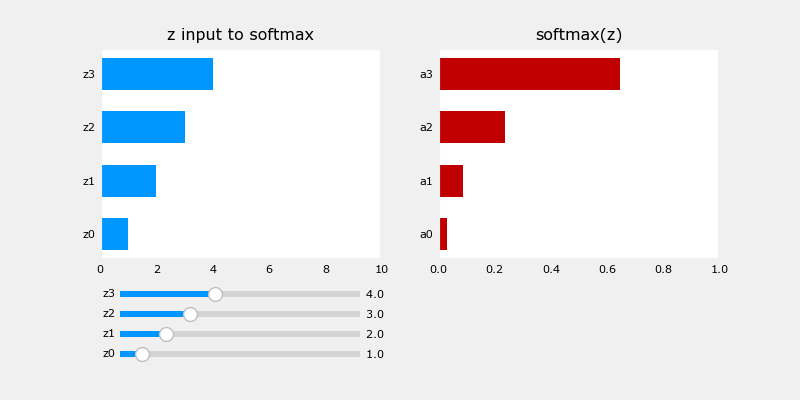

In [5]:
plt.close("all")
plt_softmax(my_softmax)

<a name="4"></a>
## 4 - Neural Networks

在上周的作业中，您实现了一个用于二分类的神经网络。本周您将扩展该网络以进行多类分类。这将使用softmax激活函数。


<a name="4.1"></a>
### 4.1 Problem Statement


在这个练习中，您将使用神经网络来识别手写数字0-9。这是一个多类分类任务，其中会从n个选择中选择其中一个。自动手写数字识别在今天被广泛应用——从识别邮件信封上的邮政编码到识别银行支票上的金额。


<a name="4.2"></a>
### 4.2 Dataset

您将从加载用于此任务的数据集开始。
- 下面显示的`load_data()`函数将数据加载到变量`X`和`y`中。


- 数据集包含5000个手写数字的训练示例$^1$。

    -  每个像素由一个浮点数表示，表示该位置的灰度强度。
    - 20x20像素网格被“展开”成为400维向量。
    -  每个训练示例成为数据矩阵X中的单个行。
    - 这给我们一个5000 x 400矩阵X，其中每行都是手写数字图像的训练示例。

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- 训练集的第二部分是一个5000 x 1维向量y，其中包含训练集的标签
- 如果图像是数字0，则y = 0，如果图像是数字4，则y = 4，依此类推。

$^1$<sub> 这是MNIST手写数字数据集的一个子集 (http://yann.lecun.com/exdb/mnist/)</sub>

In [6]:
# load dataset
X, y = load_data()

#### 4.2.1 View the variables

让我们更熟悉您的数据集。
- 一个好的起点是打印出每个变量并查看其包含的内容。

下面的代码打印变量`X`和`y`中的第一个元素。

In [10]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [11]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


#### 4.2.2 Check the dimensions of your variables

另一种熟悉数据的方法是查看其维度。请打印`X`和`y`的形状，并查看数据集中有多少个训练示例。

In [9]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.3 Visualizing the Data

您将从可视化训练集的子集开始。
- 在下面的单元格中，代码随机从`X`中选择64行，将每行映射回20像素乘以20像素的灰度图像，并将这些图像一起显示。
- 显示每个图像的标签位于图像上方

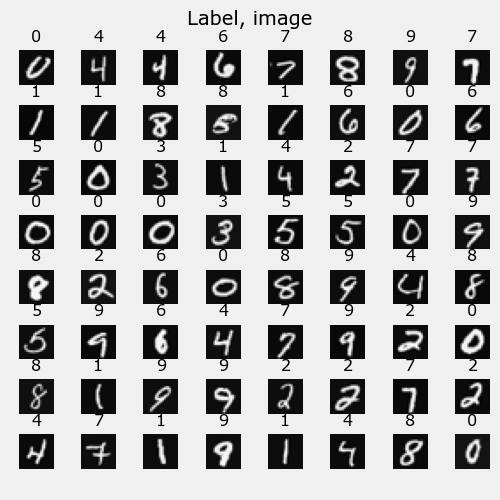

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

您将在此任务中使用的神经网络如下图所示。
- 这有两个具有ReLU激活的密集层，然后是具有线性激活的输出层。
- 回想一下，我们的输入是数字图像的像素值。
- 由于图像的大小为$20\times20$，因此给我们$400$个输入

<img src="images/C2_W2_Assigment_NN.png" width="600" height="450">

- 参数的大小适用于具有第1层$25$个单元，第2层$15$个单元和第3层$10$个输出单元（每个数字一个）的神经网络。
  
    -  回想一下，这些参数的维度如下所示：
        - 如果网络在一层中有$s_{in}$个单元，在下一层中有$s_{out}$个单元，则
            - $W$的维度将为$s_{in}\times s_{out}$。
            -  $b$将是具有$s_{out}$个元素的向量
  
    - 因此，W和b的形状分别为
        - 第1层：W1的形状为（400，25），b1的形状为（25，）
        - 第2层：W2的形状为（25，15），b2的形状为：（15，）
        - 第3层：W3的形状为（15，10），b3的形状为：（10，）
>**Note:** 偏置向量b可以表示为1-D（n，）或2-D（n，1）数组。 TensorFlow使用1-D表示法，此实验室将保持该约定：
               

<a name="4.4"></a>
### 4.4 Tensorflow Model Implementation


TensorFlow模型是逐层构建的。层的输入维度（上面的$s_{in}$）由TensorFlow为您计算。您指定一层的输出维度，这确定了下一层的输入维度。第一层的输入维度是从model.fit语句中指定的输入数据的大小推导出来的。
>**Note:** 还可以添加一个输入层，指定第一层的输入维度。例如：  

  tf.keras.Input(shape=(400,)),    #specify input shape  

  我们在这里包含它以阐明一些模型大小。



<a name="4.5"></a>
### 4.5 Softmax placement

如讲座和可选的softmax实验中所述，如果在训练期间将softmax与损失函数一起组合，可以提高数值稳定性，而不是与输出层一起使用。这在构建模型和使用模型时具有影响。  
Building:  
* 最后一个Dense层应使用“线性”激活。这实际上是没有激活。
* model.compile语句将通过包括from_logits=True来指示这一点。
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* 这不影响目标的形式。在SparseCategorialCrossentropy的情况下，目标是预期的数字，0-9。


使用模型：  
* 输出不是概率。如果需要输出概率，请应用softmax函数。

<a name="ex02"></a>
### Exercise 2

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.

In [13]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=400),
        tf.keras.layers.Dense(25,activation = 'relu',name = 'l1'),
        tf.keras.layers.Dense(15,activation = 'relu',name = 'l2'),
        tf.keras.layers.Dense(10,activation = 'linear',name = 'l3')
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [14]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 25)                10025     
                                                                 
 l2 (Dense)                  (None, 15)                390       
                                                                 
 l3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
=================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
tf.random.set_seed(1234)
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),     # @REPLACE 
        Dense(25, activation='relu', name = "L1"), # @REPLACE 
        Dense(15, activation='relu',  name = "L2"), # @REPLACE  
        Dense(10, activation='linear', name = "L3"),  # @REPLACE 
        ### END CODE HERE ### 
    ], name = "my_model" 
)
``` 

In [15]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST     

All tests passed!


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [16]:
[layer1, layer2, layer3] = model.layers

In [17]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (10,)
```

The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [18]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 834us/step - loss: 1.6097
Epoch 2/40
157/157 [==============================] - 0s 820us/step - loss: 0.5932
Epoch 3/40
157/157 [==============================] - 0s 809us/step - loss: 0.4035
Epoch 4/40
157/157 [==============================] - 0s 811us/step - loss: 0.3285
Epoch 5/40
157/157 [==============================] - 0s 817us/step - loss: 0.2896
Epoch 6/40
157/157 [==============================] - 0s 883us/step - loss: 0.2592
Epoch 7/40
157/157 [==============================] - 0s 834us/step - loss: 0.2360
Epoch 8/40
157/157 [==============================] - 0s 809us/step - loss: 0.2169
Epoch 9/40
157/157 [==============================] - 0s 817us/step - loss: 0.2064
Epoch 10/40
157/157 [==============================] - 0s 793us/step - loss: 0.1865
Epoch 11/40
157/157 [==============================] - 0s 797us/step - loss: 0.1778
Epoch 12/40
157/157 [==============================] - 0s 808us/step - loss: 0.1685
E

#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 100. This specifies that the entire data set should be applied during training 100 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/100
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/100`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (cost)
In course 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

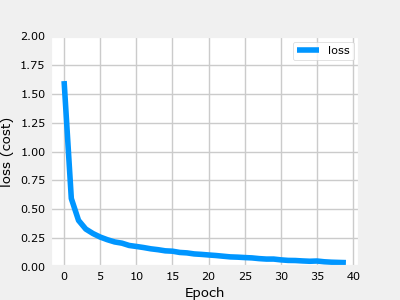

In [19]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

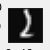

1/1 [==============================] - 0s 16ms/step
 predicting a Two: 
[[-12.13   2.45   3.58  -1.28  -9.92  -7.87  -4.48   2.18  -3.78  -6.25]]
 Largest Prediction index: 2


In [21]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [22]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[9.50e-08 2.06e-01 6.33e-01 4.93e-03 8.66e-07 6.77e-06 2.01e-04 1.56e-01
  4.04e-04 3.42e-05]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [23]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


让我们比较64个数字的随机样本的预测和标签。这需要一些时间才能运行。

1/1 [==============================] - 0s 14ms/step


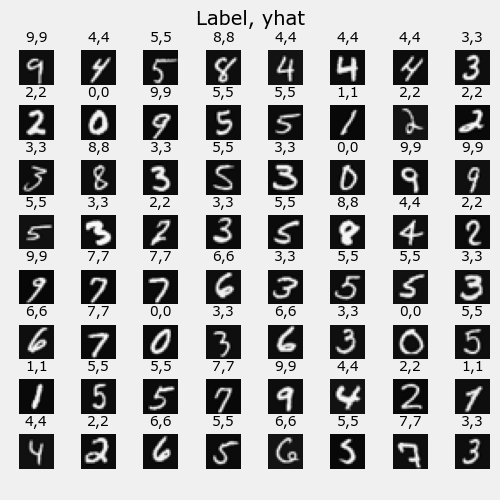

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

让我们看一些错误。 
> 注意：增加训练时期的数量可以消除此数据集中的错误。

1/1 [==============================] - 0s 14ms/step
32 errors out of 5000 images


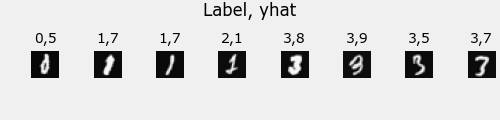

In [26]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

### Congratulations!
You have successfully built and utilized a neural network to do multiclass classification.